## 1. Credit card applications

In [1]:
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd

cc_apps = pd.read_csv("datasets/cc_approvals.data", header=None)

cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## 2. Inspecting the applications

In [2]:
print(cc_apps.describe())

print('\n')
print(cc_apps.info())

print('\n')
columns = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income','ApprovalStatus']

cc_apps.tail(17)

               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 no

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


In [3]:
cc_apps.columns = columns
cc_apps.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## 3. Handling the missing values (part i)

In [4]:
import numpy as np

# Replace the '?'s with NaN in the train and test sets
cc_apps = cc_apps.replace('?', np.nan)
cc_apps['Age'] = cc_apps.Age.astype('float')
cc_apps.dtypes



Gender             object
Age               float64
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus     object
dtype: object

## 4. Handling the missing values (part ii)


In [5]:
# Impute the missing values with mean imputation
cc_apps.fillna(cc_apps.mean(), inplace=True)

print(cc_apps.isnull().sum())


Gender            12
Age                0
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64


/var/folders/0r/2stkv5315vd8k221nlnxpz6m0000gn/T/ipykernel_18040/3406082298.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cc_apps.fillna(cc_apps.mean(), inplace=True)


## 5. Handling the missing values (part iii)

In [6]:
for col in cc_apps.columns:
    if cc_apps[col].dtypes == 'object':
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])

print(cc_apps.isnull().sum())

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64


## 6. Preprocessing the data (part i)

In [7]:
cc_apps = cc_apps.drop(['DriversLicense', 'ZipCode'], axis =1)
cc_apps = pd.get_dummies(cc_apps)

## 7. Splitting the dataset into train and test sets

In [8]:
from sklearn.model_selection import train_test_split

cc_apps_train, cc_apps_test = train_test_split(cc_apps, test_size=0.33, random_state=42)

## 8. Preprocessing the data (part ii)
<p>Now, we are only left with one final preprocessing step of scaling before we can fit a machine learning model to the data. </p>
<p>Now, let's try to understand what these scaled values mean in the real world. Let's use CreditScore as an example. The credit score of a person is their creditworthiness based on their credit history. The higher this number, the more financially trustworthy a person is considered to be. So, a CreditScore of 1 is the highest since we're rescaling all the values to the range of 0-1.</p>

In [9]:
from sklearn.preprocessing import MinMaxScaler

X_train, y_train = cc_apps_train.iloc[:, :-2].values, cc_apps_train.iloc[:, [-1]].values
X_test, y_test = cc_apps_test.iloc[:, :-2].values, cc_apps_test.iloc[:, [-1]].values

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)


## 9. Fitting a logistic regression model to the train set

In [10]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(rescaledX_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

## 10. Making predictions and evaluating performance

In [11]:
from sklearn.metrics import confusion_matrix

y_pred = logreg.predict(rescaledX_test)

print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))

confusion_matrix(y_test,y_pred)


Accuracy of logistic regression classifier:  0.8464912280701754


array([[ 93,  10],
       [ 25, 100]])

In [12]:
import math

w  = logreg.coef_[0]

feature_importance = pd.DataFrame(cc_apps_train.columns[:-2], columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

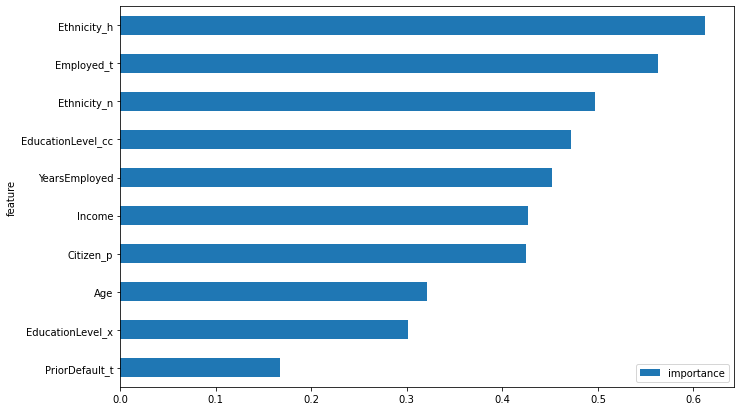

In [13]:

feature_importance_top = feature_importance.head(10)
plt.rcParams['figure.figsize'] = [11, 7]
feature_importance_top.plot.barh(x='feature', y='importance')
plt.show()


## 11. Grid searching and making the model perform better

In [14]:
from colorsys import yiq_to_rgb
from sklearn.model_selection import GridSearchCV

tol = [0.01, 0.001 ,0.0001]
max_iter = [100, 150, 200]

param_grid = dict(tol=tol, max_iter=max_iter)

## 12. Finding the best performing model

In [18]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX_train,y_train.ravel())

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_estimator_
print("Accuracy of logistic regression classifier: ", best_model)

Best: 0.857106 using {'max_iter': 100, 'tol': 0.01}
Accuracy of logistic regression classifier:  LogisticRegression(tol=0.01)
